# Setup

In [1]:
!pip install mplsoccer

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

from mplsoccer import Pitch, Sbopen, VerticalPitch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 4.2 MB/s eta 0:00:00


In [2]:
parser = Sbopen()
df_match = parser.match(competition_id=55, season_id=43)

# Shots heatmaps

In [3]:
path_eff = [path_effects.Stroke(linewidth=2, foreground='white'),
            path_effects.Normal()]

In [4]:
def plot_pitch(team):
    match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
    
    shots = pd.DataFrame()
    for idx in match_ids:
        #open the event data from this game
        df = parser.event(idx)[0]
        for period in [1, 2]:
            #keep only Shots by England in this period
            mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
            #keep only necessary columns
            shot = df.loc[mask_shot, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
            shots = pd.concat([shots, shot])

    #plot vertical pitch
    pitch = VerticalPitch(line_zorder=2, line_color='black',
                  pitch_color='#f8f5fa', half = True, goal_type='box', linewidth = 1.25)
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,endnote_height=0.04, title_space=0, endnote_space=0)
    #get the 2D histogram
    bin_statistic = pitch.bin_statistic(shots.x, shots.y, statistic='count', bins=(20, 9), normalize=True)
    #make a heatmap
    pcm  = pitch.heatmap(bin_statistic, cmap='PuRd', edgecolor='none', ax=ax['pitch'])

    #legend to our plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)

    labels = pitch.label_heatmap(bin_statistic, color='#111', fontsize=12,
                                 ax=ax['pitch'], ha='center', va='center',
                                 str_format='{:.0%}', path_effects=path_eff
                                )
    fig.set_figwidth(6)
    fig.set_figheight(6)
    fig.suptitle(team, fontsize = 16)
    plt.show()

In [5]:
participants = df_match.home_team_name.unique()

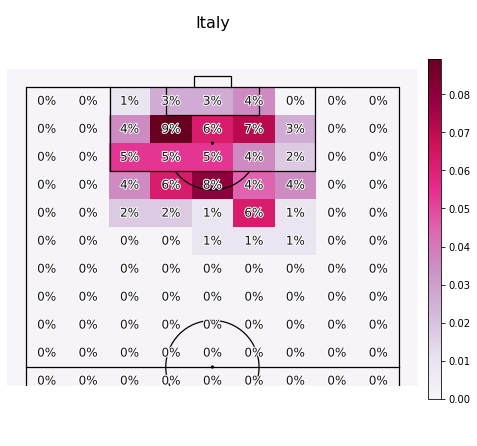

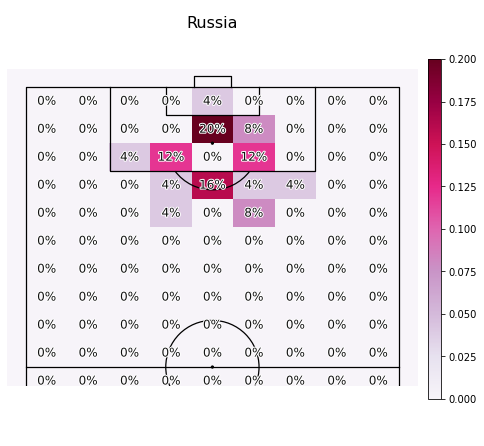

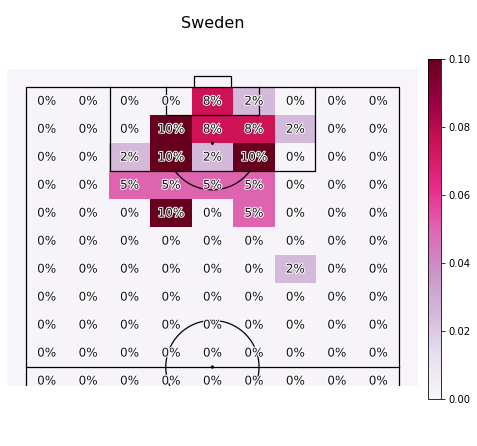

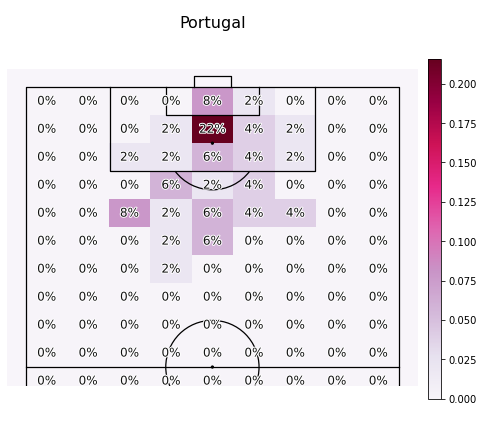

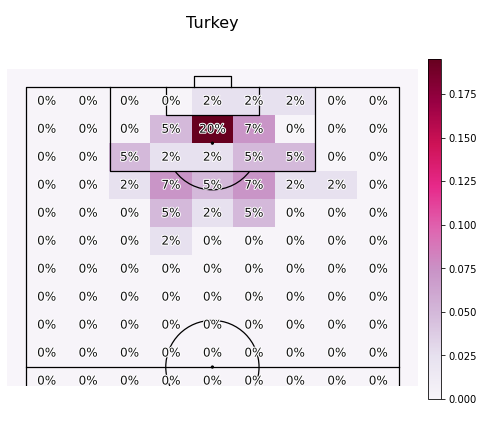

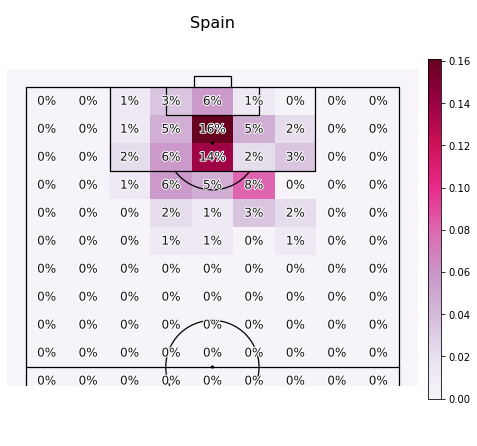

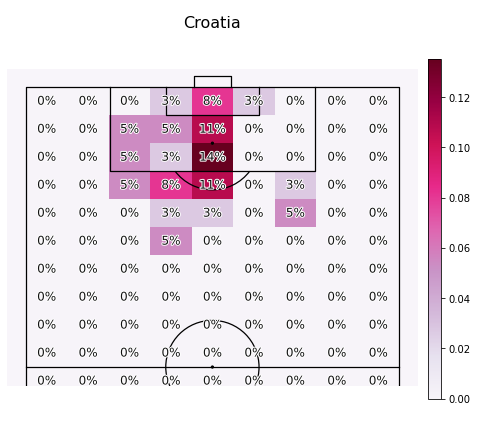

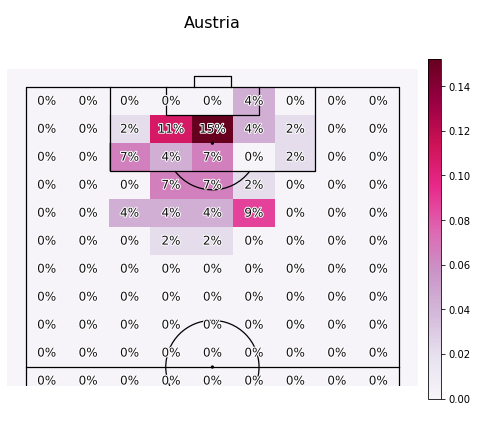

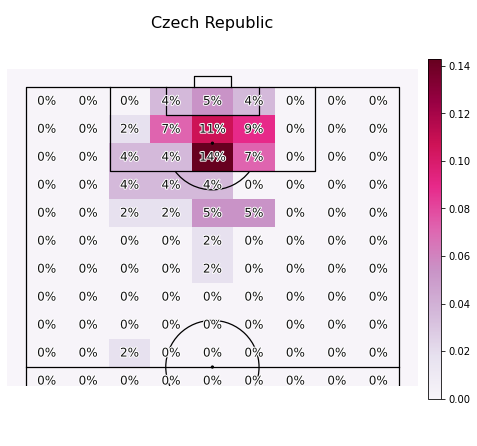

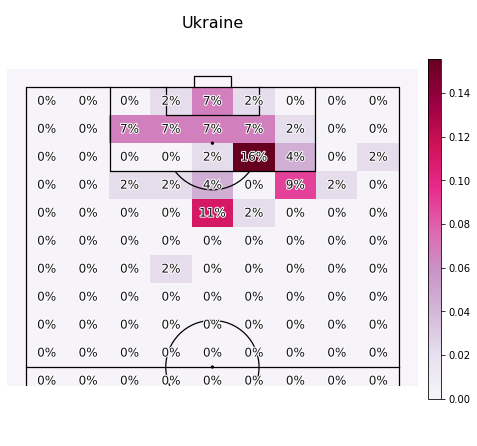

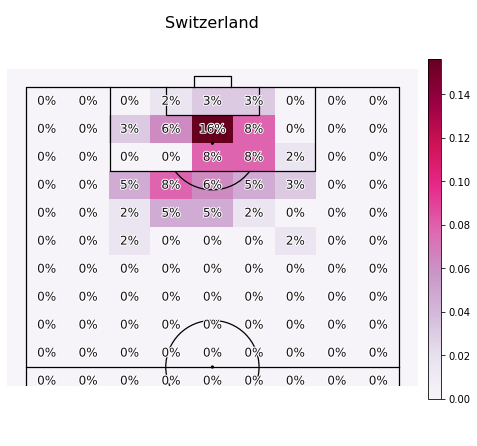

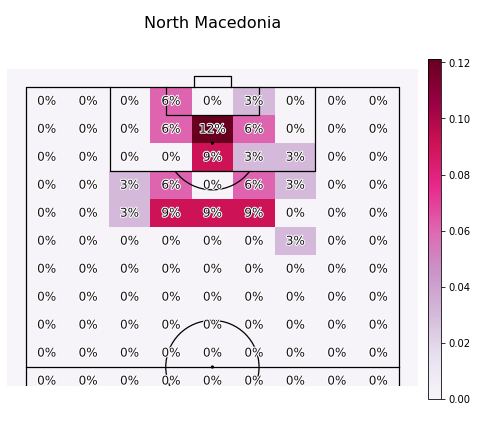

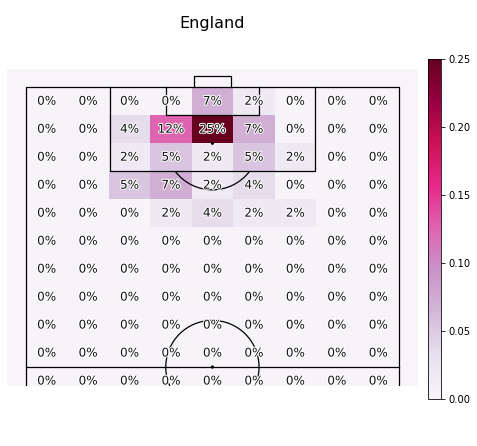

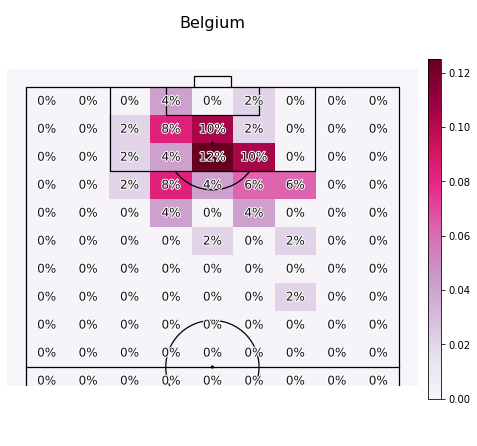

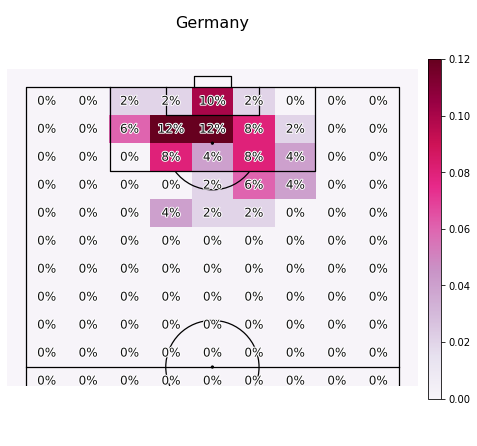

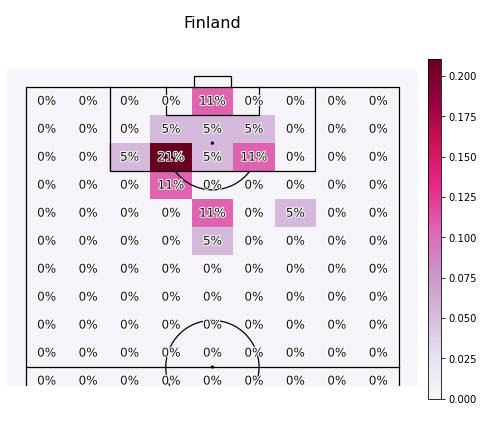

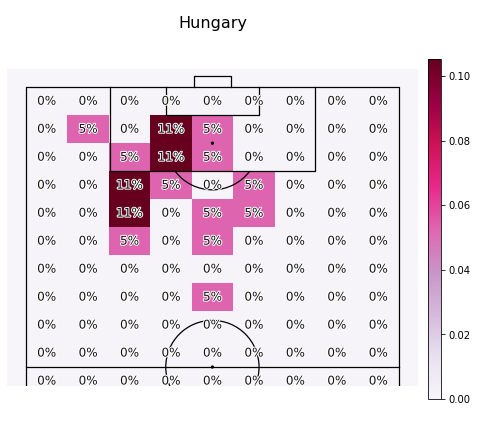

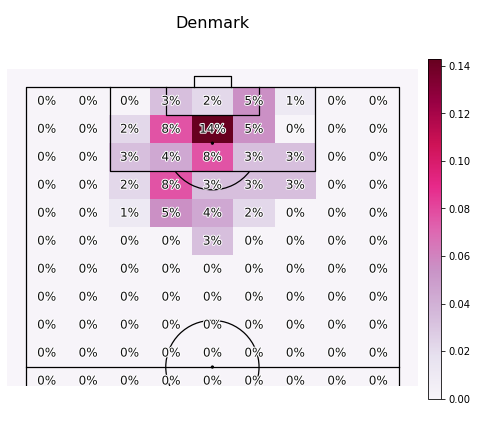

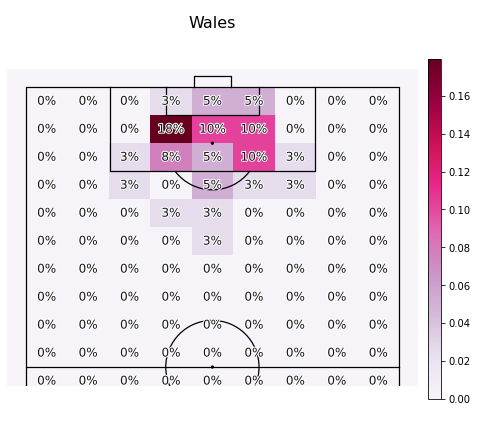

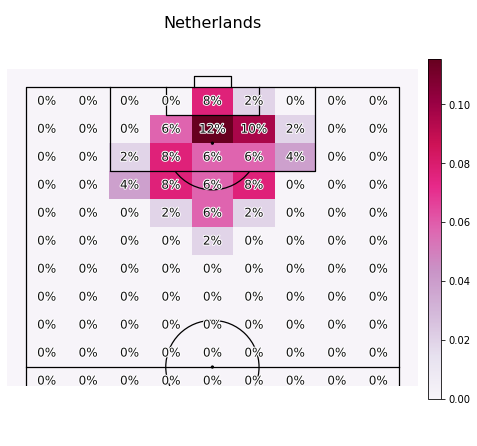

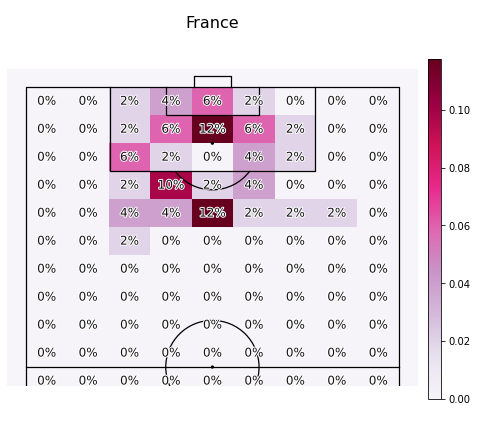

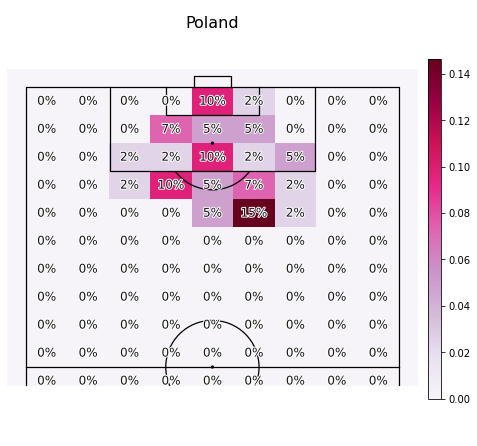

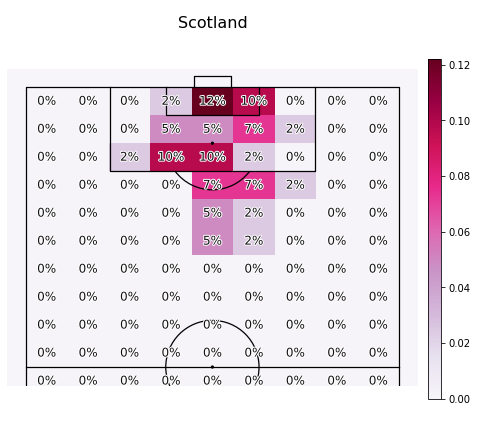

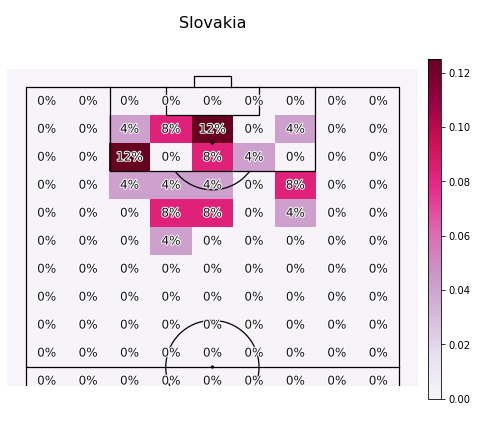

In [6]:
for country in participants:
    plot_pitch(country)